<h2>Preprocessing "Perfumes in KSA stores 2024" Dataset</h2>

- cleaned the data by extracting and imputing missing values.
- Conducted EDA
- Handled categorical data and calculated correlations.
- Conducted data visualization.

In [37]:
import pandas as pd
import numpy as np

In [38]:
df=pd.read_csv("perfumesdata.csv",encoding="utf-8")
df.head(5)

,Unnamed: 0,product_link,extracted_link,info1,product_name,discounted_price,product_price,info2,product_description,store_name,extracted_date,product_category,gender
0,0,https://saudi.ibrahimalqurashi.com/ar/%D8%A7%D...,https://cdn.salla.sa/rAoegy/9HX8xa8NpOsPRW3IpK...,50%,اريبيان توباكو 200 مل,220 ر.س,440 ر.س,إضافة للسلة,NaN,ابراهيم القرشي,2024-09-03,perfumes,NaN
1,1,https://saudi.ibrahimalqurashi.com/ar/%D8%A7%D...,https://cdn.salla.sa/rAoegy/zhOZ4Em75fC2uqBeSV...,50%,التوباكو الفرنسي 200 مل,199 ر.س,398 ر.س,إضافة للسلة,NaN,ابراهيم القرشي,2024-09-03,perfumes,NaN
2,2,https://saudi.ibrahimalqurashi.com/ar/%D8%B3%D...,https://cdn.salla.sa/rAoegy/a7361551-8afe-473b...,50%,سيترين عنبر,178 ر.س,356.01 ر.س,إضافة للسلة,NaN,ابراهيم القرشي,2024-09-03,perfumes,NaN
3,3,https://saudi.ibrahimalqurashi.com/ar/%D8%A7%D...,https://cdn.salla.sa/rAoegy/ymnLhLRPKJicMr9VAH...,50%,التوباكو الأسباني,210 ر.س,420 ر.س,إضافة للسلة,NaN,ابراهيم القرشي,2024-09-03,perfumes,NaN
4,4,https://saudi.ibrahimalqurashi.com/ar/%D8%AA%D...,https://cdn.salla.sa/rAoegy/d16747fe-dd04-418f...,50%,توق توباكو مبخر,138 ر.س,276 ر.س,إضافة للسلة,NaN,ابراهيم القرشي,2024-09-03,perfumes,NaN


EDA

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1606 (\N{ARABIC LETTER NOON}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sweetviz\graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa


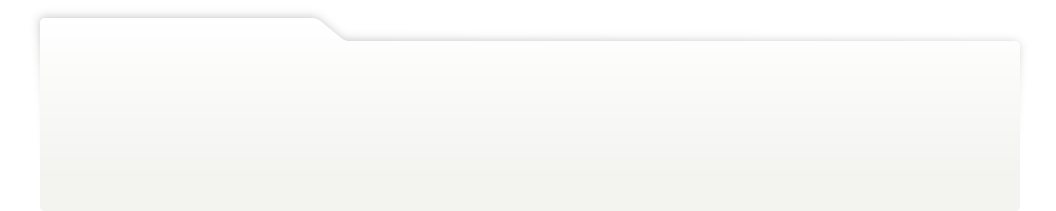
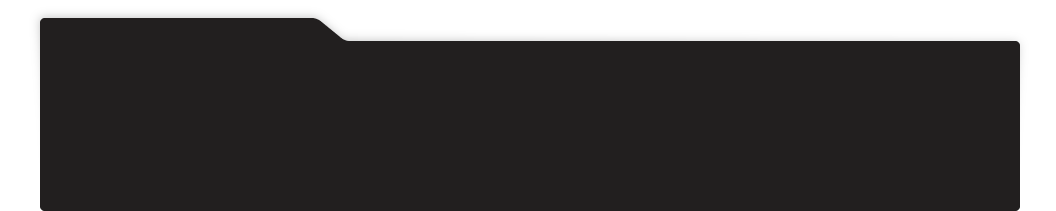
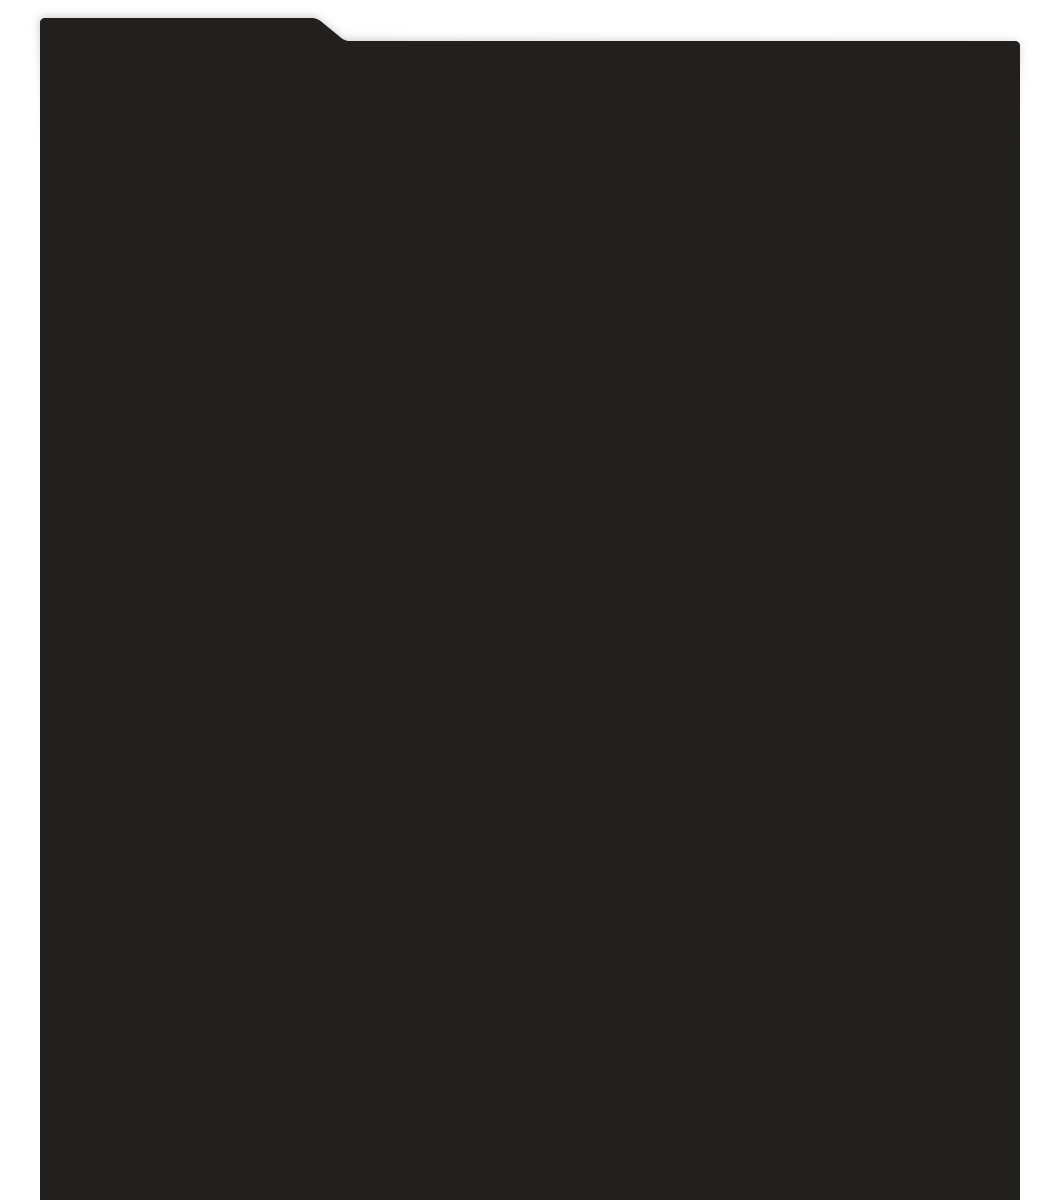
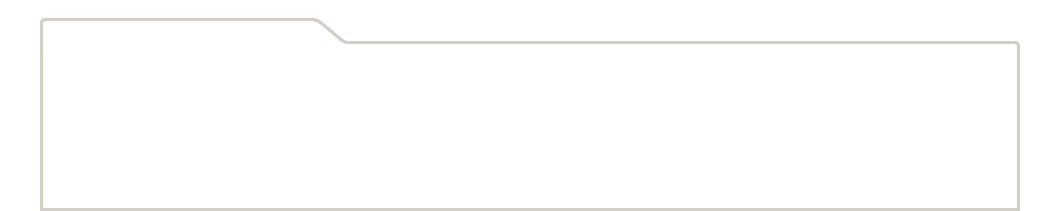
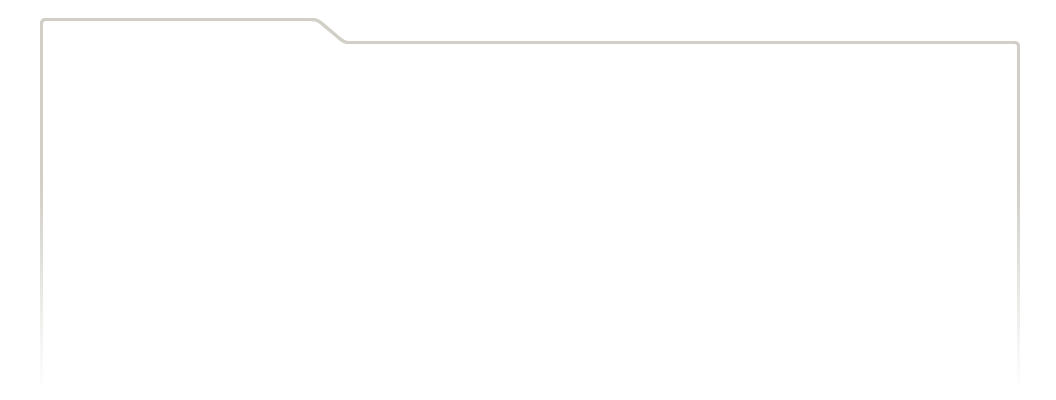
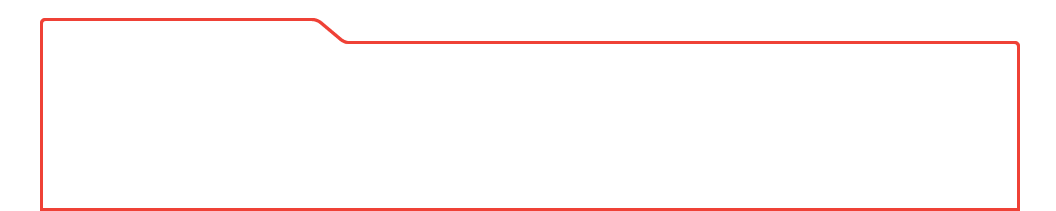
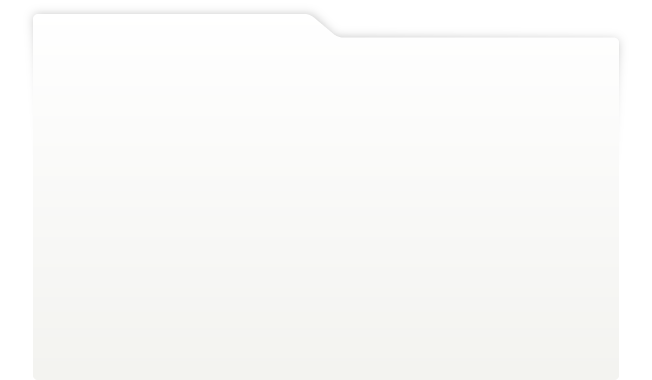
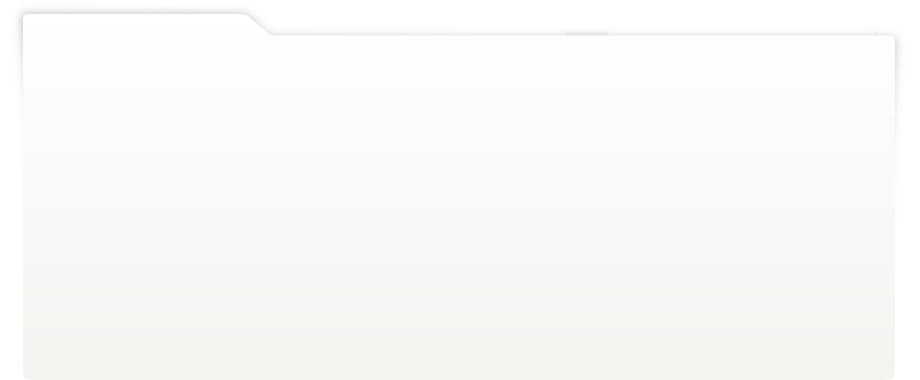
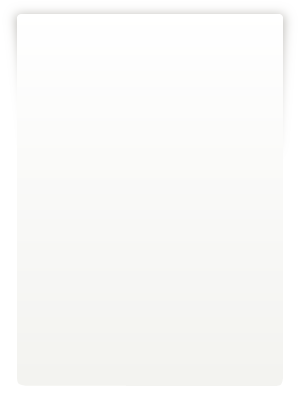
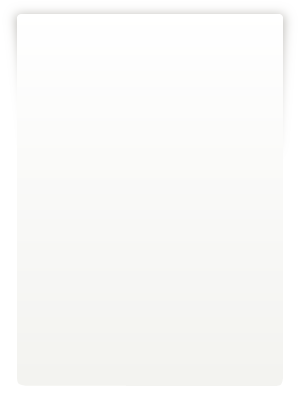
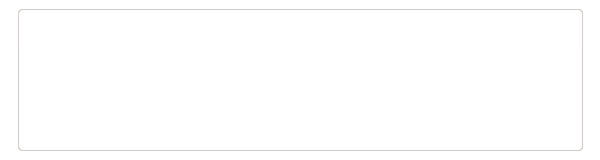
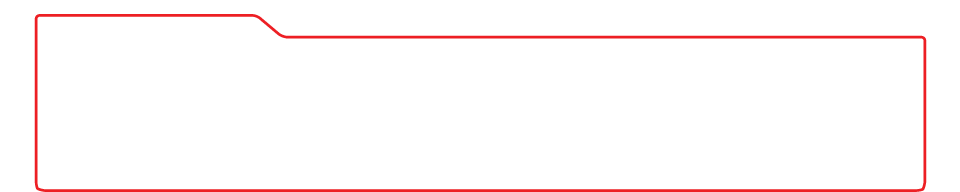
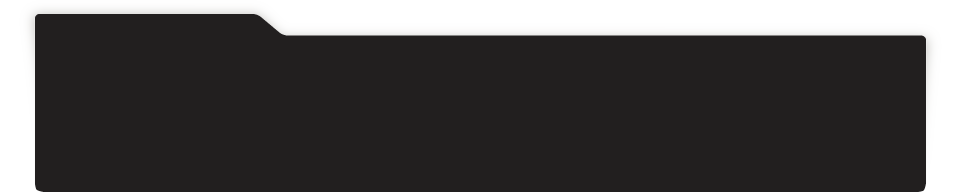
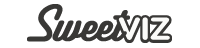
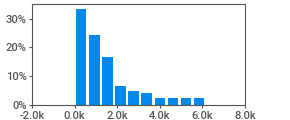
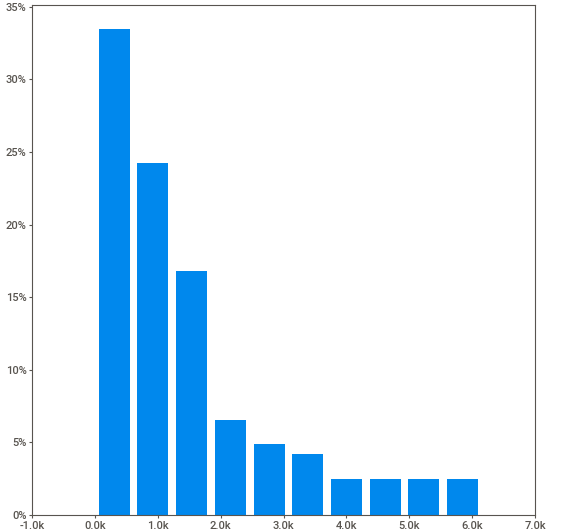
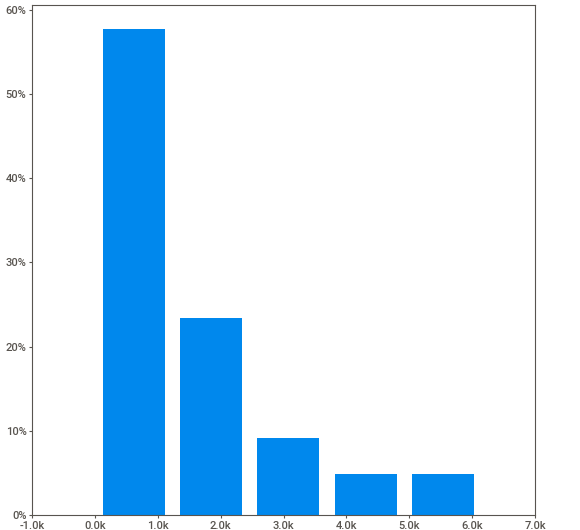
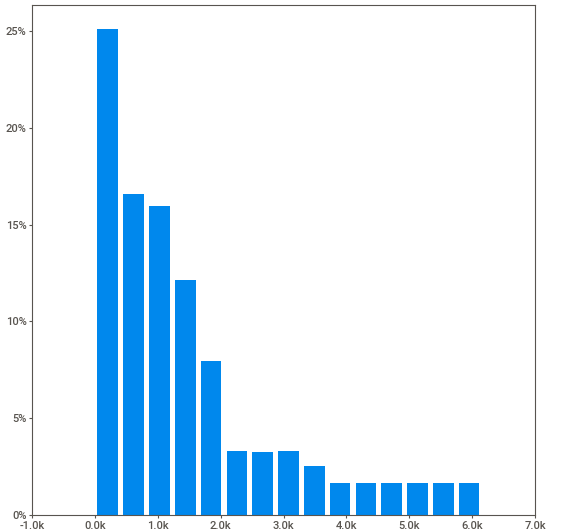
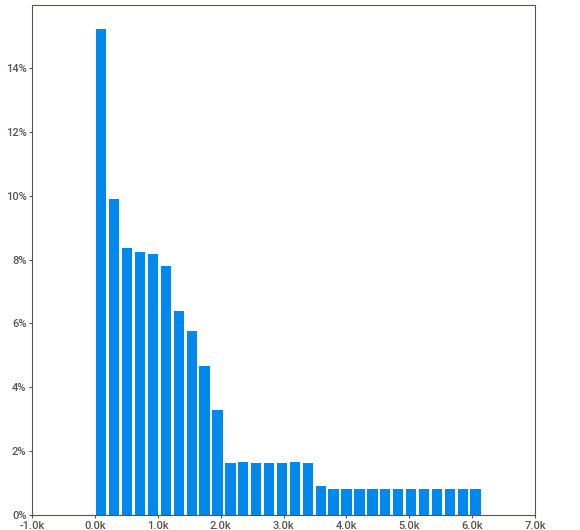
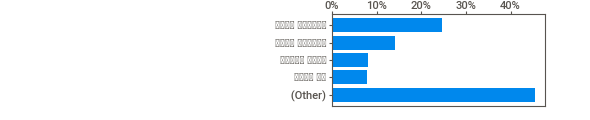
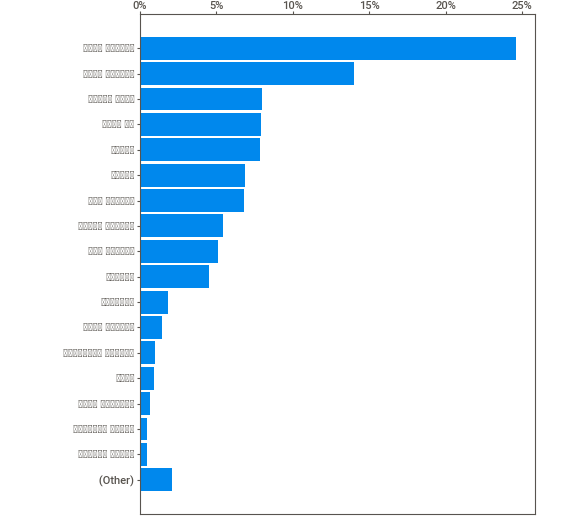
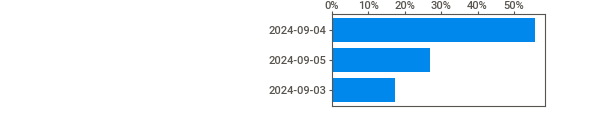
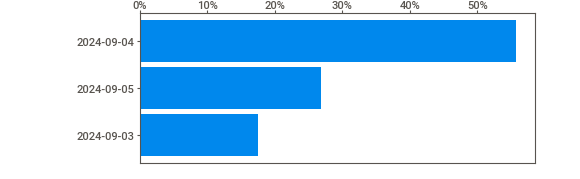
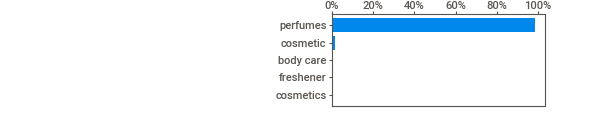
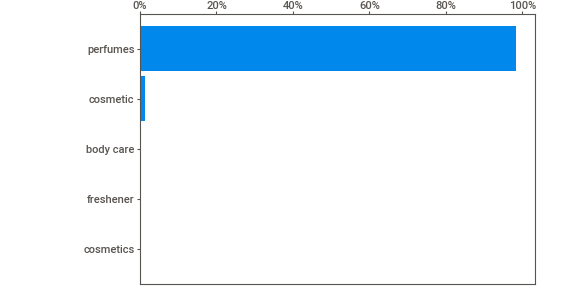
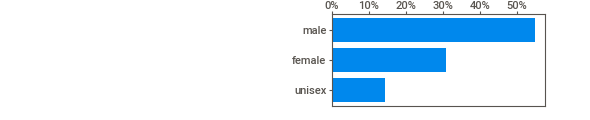
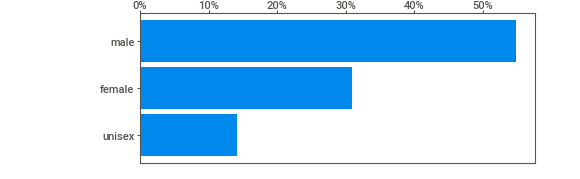
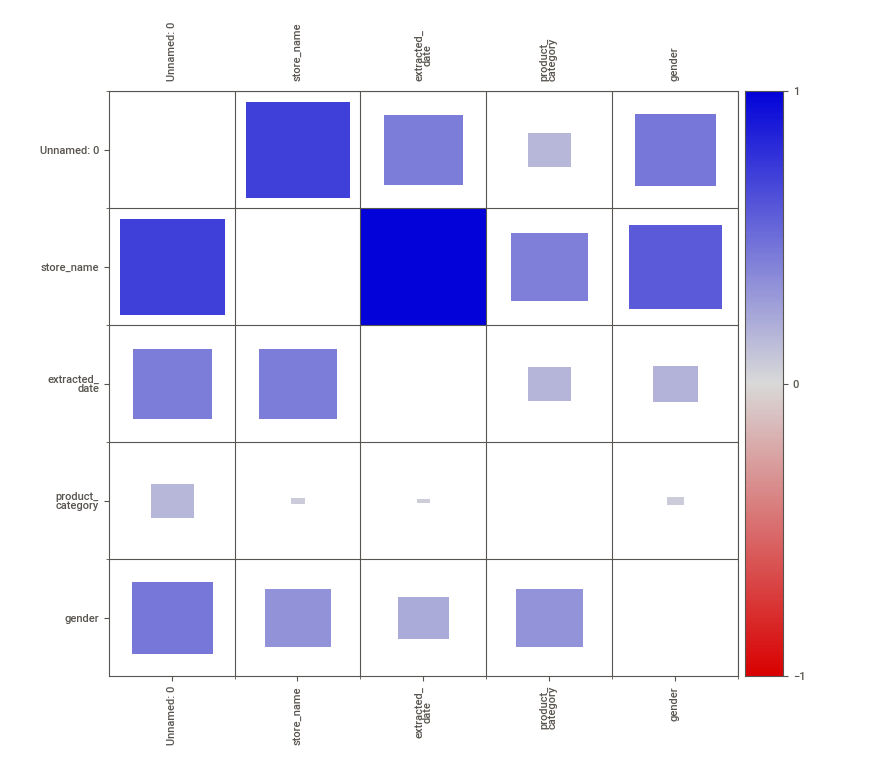
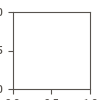

In [39]:
import sweetviz
autoEDA = sweetviz.analyze(df)
autoEDA.show_notebook()

Exctract discount percentage & discount value from column info1 $ info2 

In [40]:
import re
df['info1'] = df['info1'].astype(str)
df['info2'] = df['info2'].astype(str)
df['discount_percentage'] = df['info1'].apply(lambda x: re.findall(r'(\d+[-%]?)', x)[0] if re.search(r'[-%]', x) and re.findall(r'(\d+[-%]?)', x) else np.nan)
df['discount_percentage2'] = df['info2'].apply(lambda x: re.findall(r'(\d+[-%]?)', x)[0] if re.search(r'[-%]', x) and re.findall(r'(\d+[-%]?)', x) else np.nan)



In [41]:

count_rows = df[(df['discount_percentage'].notnull()) & (df['discounted_price'].isnull())].shape[0]

print("Number of rows with discount percentage but null discounted price:", count_rows)


Number of rows with discount percentage but null discounted price: 23


In [42]:
count_rows = df[(df['discount_percentage2'].notnull()) & (df['discounted_price'].isnull())].shape[0]

print("Number of rows with discount percentage but null discounted price:", count_rows)

Number of rows with discount percentage but null discounted price: 75


In [43]:
df['combined_discount_percentage'] = df['discount_percentage2'].astype(str) + '-' + df['discount_percentage'].astype(str)
#  extract percentage value 
def extract_percentage(value):
    if value != 'nan-nan':
        percentages = value.split('-')
        if len(percentages) == 2:
            return percentages[1]
    return np.nan

df['combined_discount_percentage'] = df['combined_discount_percentage'].apply(extract_percentage)


In [44]:
df = df.drop(['discount_percentage2', 'discount_percentage'], axis=1)
df['combined_discount_percentage'] = df['combined_discount_percentage'].str.replace('%', '')
df['combined_discount_percentage'].fillna('0',inplace=True)
df['discounted_price'].fillna('0',inplace=True)

In [45]:
import re

def extract_numeric_value(text):
    numeric_value = re.findall(r'\d+(?:,\d+)*(?:\.\d+)?', text)
    if numeric_value:
        return numeric_value[0].replace(',', '')
    return np.nan

df['discounted_price'] = df['discounted_price'].astype(str)
df['product_price'] = df['product_price'].astype(str)
df['discounted_price'] = df['discounted_price'].apply(extract_numeric_value)
df['product_price'] = df['product_price'].apply(extract_numeric_value)

In [46]:
df['combined_discount_percentage']=df['combined_discount_percentage'].astype(float)
df['discounted_price']=df['discounted_price'].astype(float)
df['product_price']=df['product_price'].astype(float)
df['combined_discount_percentage'].fillna(0,inplace=True)
df['product_price'].fillna(0,inplace=True)

In [47]:
df['combined_discount_percentage'].unique()

array([  50.,    0.,   96.,    9.,   74.,  555.,  556., 1005.,  856.,
        305.,  648.,   45.,   31.,  651.,  136.,   19.,  141.,  196.,
        437., 1996.,   42.,   46.,   32.,   12.,   49.,   38.,   43.,
         20.,   16.,   23.,   59.,   55.,   37.,   57.,   24.,   33.,
         52.,   36.,   44.,   40.,   47.,   58.,   27.,   64.,   68.,
         79.,   25.,   41.,   53.,   62.,   39.,   35.,   22.,   30.,
         10.,   70.,    5.,   15.,   60.,   75.,   65.,   69.,   72.,
         26.,   48.,   66.,   63.,    6.,    8.,   14.,   13.,   54.,
         81.,   17.,    2.,   18.,    7.,   71.,   51.,   29.,   28.,
         34.,    4.,   84.,   11.,   67.,   56.,   21.,   61.,    3.,
         73.])

In [48]:
df['discounted_price'].unique()

array([ 220.  ,  199.  ,  178.  , ..., 1438.  ,  936.  , 1397.83])

In [49]:
df['product_price'].unique()

array([440.  , 398.  , 356.01, ..., 611.1 , 498.5 , 550.2 ])

In [50]:

# Calculate discounted price and change the type of 'combined_discount_percentage' to int
mask = (df['combined_discount_percentage']>0.) & (df['discounted_price']==0.)

df.loc[mask, 'discounted_price'] = df['product_price']

df.loc[mask, 'combined_discount_percentage'] = df.loc[mask, 'combined_discount_percentage']

df.loc[mask, 'discounted_price'] = df.loc[mask, 'discounted_price'].apply(
    lambda x: x - (x * (df.loc[mask, 'combined_discount_percentage'] / 100)) if x < 100 else x - df.loc[mask, 'combined_discount_percentage'])




In [51]:
df['product_price'] = df['product_price'].replace(0, np.nan)
df['discounted_price'] = df['discounted_price'].replace(0, np.nan)


Exctract price from column info1 

In [52]:
import re


def extract_price(text):
    price_match = re.search(r'(\d+(\.\d+)?)', text)
    if 'السعر' in text or 'S.R' in text:
        if price_match:
            return float(price_match.group())
    return np.nan


df['price'] = df['info1'].apply(extract_price)



In [53]:
df['price'].unique()

array([   nan,  57.39,  86.09, 300.  ,  80.  , 120.  , 165.  ,  60.  ,
       173.04, 190.  ,  85.  ,  75.  , 180.  ,  90.  , 220.  , 164.35,
        55.  , 225.  , 140.  , 250.  , 160.  , 170.  ,  65.  ,  70.  ,
       129.57, 217.5 , 125.  , 110.  ,  50.  ,   1.  , 845.  , 816.5 ,
       707.25, 661.25, 615.25, 402.5 , 977.  , 875.  , 500.  , 494.5 ,
         2.  , 749.8 , 730.25, 960.25, 851.  , 640.  , 920.  ,   0.  ,
       423.2 , 649.  , 809.  , 819.95, 595.  , 563.5 , 632.5 , 695.  ,
       282.  , 699.  , 734.  , 460.  , 824.55, 664.7 ])

In [54]:
# Update 'product_price' with values from 'price' where 'price' is not null and 'product_price' is null
mask = (df['price'].notnull()) & (df['product_price'].isnull())
df.loc[mask, 'product_price'] = df.loc[mask, 'price']


In [55]:
df = df.drop(['price'], axis=1)

handel missing gender & product name  

In [56]:
mode_gender = df['gender'].mode()[0]
df['gender'].fillna(mode_gender, inplace=True)


In [57]:
mode_name = df['product_name'].mode()[0]
df['product_name'].fillna(mode_name, inplace=True)

In [58]:
df.isnull().sum()

Unnamed: 0                          0
product_link                        0
extracted_link                   2311
info1                               0
product_name                        0
discounted_price                18306
product_price                    5979
info2                               0
product_description             13641
store_name                          0
extracted_date                      0
product_category                    0
gender                              0
combined_discount_percentage        0
dtype: int64

Handel missing product price and discounted price using Iterative imputer 

In [59]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

imputer = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0)
columns_to_impute = ['product_price', 'discounted_price']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [60]:
df.isnull().sum()

Unnamed: 0                          0
product_link                        0
extracted_link                   2311
info1                               0
product_name                        0
discounted_price                    0
product_price                       0
info2                               0
product_description             13641
store_name                          0
extracted_date                      0
product_category                    0
gender                              0
combined_discount_percentage        0
dtype: int64

In [61]:
dfNew=df[["product_name","store_name","gender","product_price","discounted_price","product_category","combined_discount_percentage"]]

Encoding categorical data 

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfNew['gender'] = le.fit_transform(dfNew['gender'])
dfNew['store_name'] = le.fit_transform(dfNew['store_name'])
dfNew['product_name'] = le.fit_transform(dfNew['product_name'])
dfNew['product_category'] = le.fit_transform(dfNew['product_category'])


C:\Users\samar\AppData\Local\Temp\ipykernel_13212\2482300240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['gender'] = le.fit_transform(dfNew['gender'])
C:\Users\samar\AppData\Local\Temp\ipykernel_13212\2482300240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['store_name'] = le.fit_transform(dfNew['store_name'])
C:\Users\samar\AppData\Local\Temp\ipykernel_13212\2482300240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [63]:
dfNew.head()

,product_name,store_name,gender,product_price,discounted_price,product_category,combined_discount_percentage
0,990,0,1,440.00,220.0,4,50.0
1,1093,0,1,398.00,199.0,4,50.0
2,4075,0,1,356.01,178.0,4,50.0
3,1090,0,1,420.00,210.0,4,50.0
4,2763,0,1,276.00,138.0,4,50.0


Calculate the correlation matrix

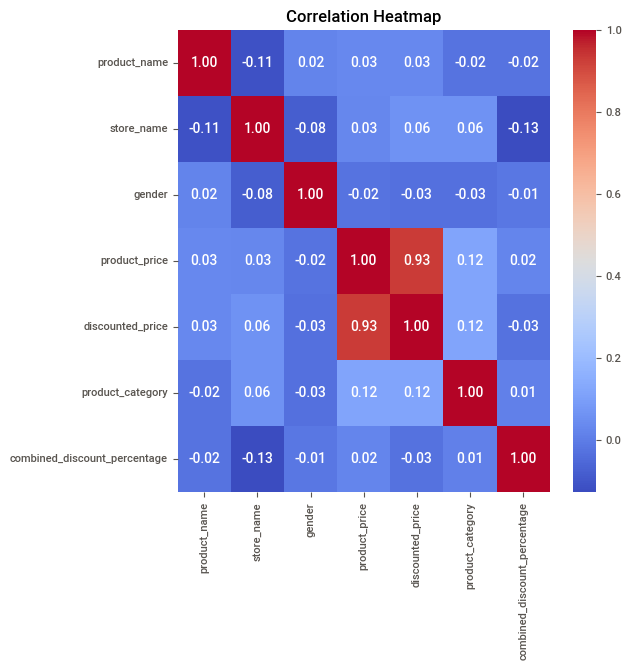

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = dfNew.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Data Visuals

In [84]:
arabic_to_english = {
    # Common store names
    'ابراهيم القرشي': 'Ibrahim Al Qurashi',
    'اروماتك': 'Aromatic',
    'الدخيل للعود': 'Al Dakheel for Oud',
    'العربية للعود': 'Al Arabiya for Oud',
    'الماجد للعود': 'Al Majid for Oud',
    'اوناس': 'Ounas',
    'باريس جالاري': 'Paris Gallery',
    'بازل': 'Basel',
    'جولدن سينت': 'Golden Scent',
    'خبير العطور': 'Expert Perfumer',
    'دخون': 'Dukhon',
    'دخون الاماراتية': 'Dukhon Emirati',
    'درعة للعطور': 'Dura for Perfumes',
    'رسما للعطور': 'Resma for Perfumes',
    'رين للعطور': 'Reen for Perfumes',
    'سيفورا': 'Sephora',
    'شجاع': 'Shajaa',
    'عاشق العطور': 'Lover of Perfumes',
    'عبدالصمد القرشي': 'Abdul Samad Al Qurashi',
    'عساف': 'Asaf',
    'عطور المصباح': 'Perfumes of Almesbah',
    'عطور ريف': 'Perfumes of Arref',
    'فيسيس': 'Faces',
    'فيصل الدايل': 'Faisal Al Daail',
    'لادورية': 'Ladouria',
    'لافيرن': 'Laverne',
    'نايس ون': 'Nice One',
    'نجد العذية': 'Najd Al Udhaya',

}

def translate_store_name(name):
    return arabic_to_english.get(name, name) 
df['store_name'] = df['store_name'].apply(translate_store_name)



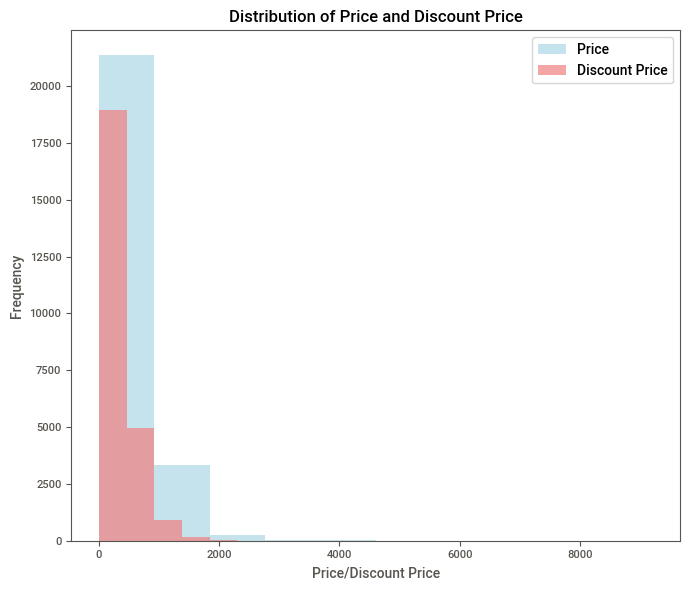

In [70]:
import pandas as pd
import matplotlib.pyplot as plt




colors = ["lightblue", "lightcoral"]

fig, ax = plt.subplots(figsize=(7, 6))


ax.hist(df["product_price"], bins=10, color=colors[0], alpha=0.7, label="Price")
ax.hist(df["discounted_price"], bins=10, color=colors[1], alpha=0.7, label="Discount Price")


ax.set_title("Distribution of Price and Discount Price")
ax.set_xlabel("Price/Discount Price")
ax.set_ylabel("Frequency")
ax.legend() 

plt.tight_layout()
plt.show()

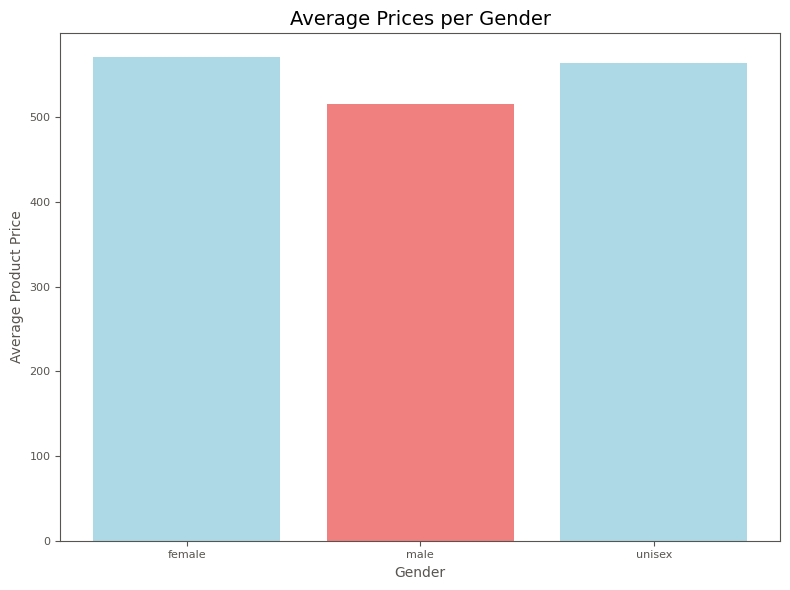

In [75]:

average_prices = df.groupby("gender")["product_price"].mean()  


light_colors = ["lightblue", "lightcoral"] 


plt.figure(figsize=(8, 6))
plt.bar(average_prices.index, average_prices.values, color=light_colors)


plt.xlabel("Gender")
plt.ylabel("Average Product Price")
plt.title("Average Prices per Gender", fontsize=14)


plt.tight_layout()
plt.show()

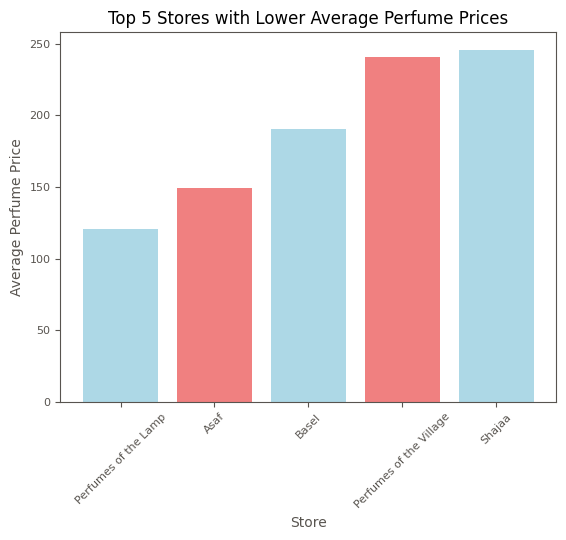

In [85]:


average_prices = df.groupby("store_name")["product_price"].mean().sort_values()


top_5_stores = average_prices.head(5)
light_colors = ["lightblue", "lightcoral"] 
# Create the bar chart
plt.bar(top_5_stores.index, top_5_stores.values,color=light_colors)
plt.xlabel("Store")
plt.ylabel("Average Perfume Price")
plt.title("Top 5 Stores with Lower Average Perfume Prices")
plt.xticks(rotation=45)
plt.show()

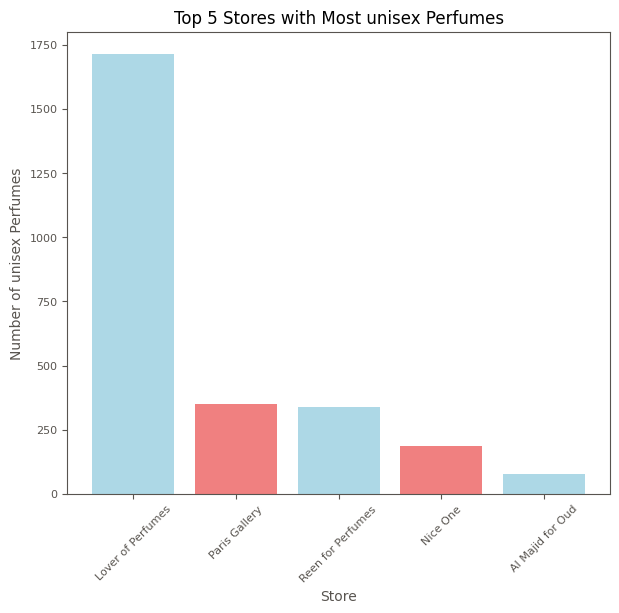

In [90]:
import pandas as pd
import matplotlib.pyplot as plt


unisex_perfumes = df[df["gender"] == "unisex"]


store_counts = unisex_perfumes.groupby("store_name").size().reset_index(name="unisex_perfume_count")


top_5_stores = store_counts.nlargest(5, "unisex_perfume_count")

light_colors = ["lightblue", "lightcoral"] 

plt.figure(figsize=(7, 6))
plt.bar(top_5_stores["store_name"], top_5_stores["unisex_perfume_count"],color=light_colors)


plt.xlabel("Store")
plt.ylabel("Number of unisex Perfumes")
plt.title("Top 5 Stores with Most unisex Perfumes")
plt.xticks(rotation=45)

plt.show()

Done by : Samar Almutairi 